In [1]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
data.shape

(569, 33)

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


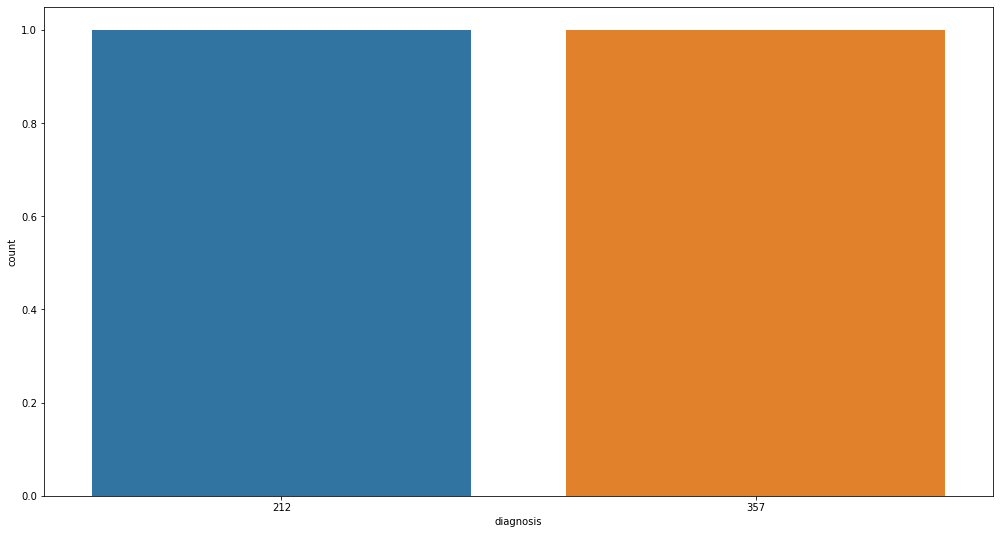

In [7]:
plt.figure(figsize=[17,9])
sb.countplot(data['diagnosis'].value_counts())
plt.show()

In [8]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [10]:
data['diagnosis']=labelencoder.fit_transform(data['diagnosis'])

In [12]:
x = data.drop('diagnosis',axis=1)

y = data.diagnosis

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=40)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [15]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [16]:
#creating model
classifier = Sequential()

In [17]:
#first hidden layer
classifier.add(Dense(units=30,activation='relu'))
#second hidden layer
classifier.add(Dense(units=10,activation='relu'))
# last layer or output layer
classifier.add(Dense(units=1,activation='relu'))

In [19]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
 #fitting the ANN to the training set
model = classifier.fit(xtrain,ytrain,validation_split=0.30,batch_size=10,epochs=20)

Epoch 1/20
28/28 [==============================] - 3s 26ms/step - loss: 2.8915 - accuracy: 0.6151 - val_loss: 2.8732 - val_accuracy: 0.6000
Epoch 2/20
28/28 [==============================] - 0s 6ms/step - loss: 1.3154 - accuracy: 0.6763 - val_loss: 2.1257 - val_accuracy: 0.6917
Epoch 3/20
28/28 [==============================] - 0s 7ms/step - loss: 0.6879 - accuracy: 0.7914 - val_loss: 0.6954 - val_accuracy: 0.8250
Epoch 4/20
28/28 [==============================] - 0s 6ms/step - loss: 0.3147 - accuracy: 0.8489 - val_loss: 0.5711 - val_accuracy: 0.8750
Epoch 5/20
28/28 [==============================] - 0s 6ms/step - loss: 0.2485 - accuracy: 0.8993 - val_loss: 0.4138 - val_accuracy: 0.9000
Epoch 6/20
28/28 [==============================] - 0s 6ms/step - loss: 0.2090 - accuracy: 0.9317 - val_loss: 0.3844 - val_accuracy: 0.9333
Epoch 7/20
28/28 [==============================] - 0s 7ms/step - loss: 0.1449 - accuracy: 0.9424 - val_loss: 0.3921 - val_accuracy: 0.9083
Epoch 8/20
28/28 [=

In [38]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [22]:
#now testing for Test data
y_pred = classifier.predict(xtest)

6/6 [==============================] - 0s 3ms/step


In [23]:
#converting values
y_pred = (y_pred>0.5)
print(y_pred)

[[False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(ytest,y_pred)
score = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score)

[[112   3]
 [  1  55]]
score is: 0.9766081871345029


In [25]:
# list all data in history
print(model.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


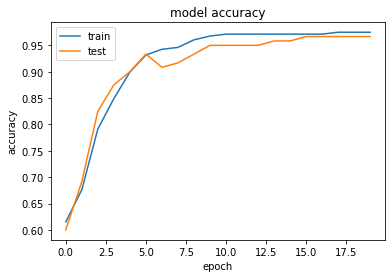

In [26]:
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     

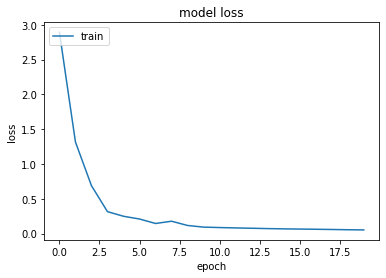

In [27]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

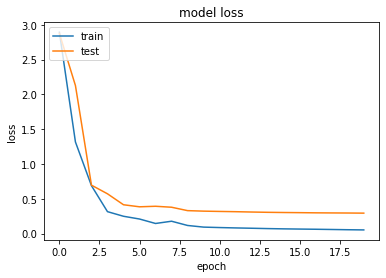

In [28]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       115
           1       0.95      0.98      0.96        56

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



In [30]:
score

0.9766081871345029

In [33]:
import pickle

In [34]:
pickle.dump(model,open('breast_cancer_ann.pickle','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-05 10:12:23         1788
metadata.json                                  2023-02-05 10:12:23           64
variables.h5                                   2023-02-05 10:12:23        36464


In [35]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is E884-7776

 Directory of C:\Users\SANJIVANI\ANN

2023-02-05  10:12    <DIR>          .
2023-02-05  10:12    <DIR>          ..
2023-02-04  10:12    <DIR>          .ipynb_checkpoints
2023-02-05  10:12            91,814 breast_cancer_ann.ipynb
2023-02-05  10:12            39,724 breast_cancer_ann.pickle
2023-02-04  10:11           125,204 data.csv
               3 File(s)        256,742 bytes
               3 Dir(s)  342,717,304,832 bytes free


In [36]:
model = pickle.load((open('breast_cancer_ann.pickle','rb')))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-05 10:12:22         1788
metadata.json                                  2023-02-05 10:12:22           64
variables.h5                                   2023-02-05 10:12:22        36464
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


In [37]:
model